# Chapter 27: Supervised Learning with scikit-learn

## 1. Classification

k-Nearest Neighbors: Fit

Having explored the Congressional voting records dataset, it is time now to build your first classifier. In this exercise, you will fit a k-Nearest Neighbors classifier to the voting dataset, which has once again been pre-loaded for you into a DataFrame df.

In the video, Hugo discussed the importance of ensuring your data adheres to the format required by the scikit-learn API. The features need to be in an array where each column is a feature and each row a different observation or data point - in this case, a Congressman's voting record. The target needs to be a single column with the same number of observations as the feature data. We have done this for you in this exercise. Notice we named the feature array X and response variable y: This is in accordance with the common scikit-learn practice.

Your job is to create an instance of a k-NN classifier with 6 neighbors (by specifying the n_neighbors parameter) and then fit it to the data. The data has been pre-loaded into a DataFrame called df.
Instructions
0 XP

    Import KNeighborsClassifier from sklearn.neighbors.
    Create arrays X and y for the features and the target variable. Here this has been done for you. Note the use of .drop() to drop the target variable 'party' from the feature array X as well as the use of the .values attribute to ensure X and y are NumPy arrays. Without using .values, X and y are a DataFrame and Series respectively; the scikit-learn API will accept them in this form also as long as they are of the right shape.
    Instantiate a KNeighborsClassifier called knn with 6 neighbors by specifying the n_neighbors parameter.
    Fit the classifier to the data using the .fit() method.

Hint

    To import thing from pkg, use the command from pkg import thing.
    To instantiate a KNeighborsClassifier with 6 neighbors, use the function KNeighborsClassifier() and specify the keyword argument n_neighbors=6.
    Use the .fit() method on knn with X and y passed in as the arguments.


In [14]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier 
import numpy as np
# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

NameError: name 'df' is not defined

k-Nearest Neighbors: Predict

Having fit a k-NN classifier, you can now use it to predict the label of a new data point. However, there is no unlabeled data available since all of it was used to fit the model! You can still use the .predict() method on the X that was used to fit the model, but it is not a good indicator of the model's ability to generalize to new, unseen data.

In the next video, Hugo will discuss a solution to this problem. For now, a random unlabeled data point has been generated and is available to you as X_new. You will use your classifier to predict the label for this new data point, as well as on the training data X that the model has already seen. Using .predict() on X_new will generate 1 prediction, while using it on X will generate 435 predictions: 1 for each sample.

The DataFrame has been pre-loaded as df. This time, you will create the feature array X and target variable array y yourself.
Instructions
0 XP

    Create arrays for the features and the target variable from df. As a reminder, the target variable is 'party'.
    Instantiate a KNeighborsClassifier with 6 neighbors.
    Fit the classifier to the data.
    Predict the labels of the training data, X.
    Predict the label of the new data point X_new.

Hint

    To create the target variable y, select the 'party' column of df and access its .values attribute. To create the feature array X, use the .drop() method on df with 'party' and axis=1 as arguments. Then access its .values attribute.
    To instantiate the classifier, use KNeighborsClassifier and specify the number of neighbors using the n_neighbors parameter.
    Use the .fit() method with X and y as arguments to fit the classifier to the data.
    Use the .predict() method on X to predict the labels of the training data.
    Use the .predict() method on X_new to predict the label of the new data point.


In [15]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier 

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

# Predict the labels for the training data X: y_pred
y_pred = knn.predict(X)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction)) 


NameError: name 'df' is not defined

### Measuring Model Performance

The digits recognition dataset

Up until now, you have been performing binary classification, since the target variable had two possible outcomes. Hugo, however, got to perform multi-class classification in the videos, where the target variable could take on three possible outcomes. Why does he get to have all the fun?! In the following exercises, you'll be working with the MNIST digits recognition dataset, which has 10 classes, the digits 0 through 9! A reduced version of the MNIST dataset is one of scikit-learn's included datasets, and that is the one we will use in this exercise.

Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black. Recall that scikit-learn's built-in datasets are of type Bunch, which are dictionary-like objects. Helpfully for the MNIST dataset, scikit-learn provides an 'images' key in addition to the 'data' and 'target' keys that you have seen with the Iris data. Because it is a 2D array of the images corresponding to each sample, this 'images' key is useful for visualizing the images, as you'll see in this exercise (for more on plotting 2D arrays, see Chapter 2 of DataCamp's course on Data Visualization with Python). On the other hand, the 'data' key contains the feature array - that is, the images as a flattened array of 64 pixels.

Notice that you can access the keys of these Bunch objects in two different ways: By using the . notation, as in digits.images, or the [] notation, as in digits['images'].

For more on the MNIST data, check out this exercise in Part 1 of DataCamp's Importing Data in Python course. There, the full version of the MNIST dataset is used, in which the images are 28x28. It is a famous dataset in machine learning and computer vision, and frequently used as a benchmark to evaluate the performance of a new model.
Instructions
0 XP

    Import datasets from sklearn and matplotlib.pyplot as plt.
    Load the digits dataset using the .load_digits() method on datasets.
    Print the keys and DESCR of digits.
    Print the shape of images and data keys using the . notation.
    Display the 1011th image using plt.imshow(). This has been done for you, so hit submit to see which handwritten digit this happens to be!

Hint

    To import x from y, use the command from y import x, and use import x as y to import x as the alias y.
    Use datasets.load_digits() to load the digits dataset.
    Use the .keys() method on digits to access its keys, and .DESCR to access its description.
    Inside the provided print() functions, access the images and data keys of digits with digits.images and digits.data. The .shape attribute has already been provided for you.


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

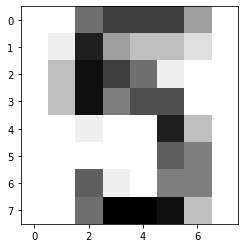

In [16]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

Train/Test Split + Fit/Predict/Accuracy

Now that you have learned about the importance of splitting your data into training and test sets, it's time to practice doing this on the digits dataset! After creating arrays for the features and target variable, you will split them into training and test sets, fit a k-NN classifier to the training data, and then compute its accuracy using the .score() method.
Instructions
0 XP

    Import KNeighborsClassifier from sklearn.neighbors and train_test_split from sklearn.model_selection.
    Create an array for the features using digits.data and an array for the target using digits.target.
    Create stratified training and test sets using 0.2 for the size of the test set. Use a random state of 42. Stratify the split according to the labels so that they are distributed in the training and test sets as they are in the original dataset.
    Create a k-NN classifier with 7 neighbors and fit it to the training data.
    Compute and print the accuracy of the classifier's predictions using the .score() method.

Hint

    Use the command from y import x to import x from y.
    Assign digits.data to the variable X to create an array for the features and assign digits.target to y to create an array for the target variable.
    Use the train_test_split() function and pass in the arguments X, y, and specify the keyword arguments test_size, random_state, and stratify to create the training and test sets.
    Use KNeighborsClassifier() to instantiate the classifier and specify the number of neighbors using the n_neighbors parameter.
    To compute the accuracy of the classifier, use the .score() method on knn with X_test and y_test as arguments.


In [17]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


Overfitting and underfitting

Remember the model complexity curve that Hugo showed in the video? You will now construct such a curve for the digits dataset! In this exercise, you will compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, you will develop your intuition for overfitting and underfitting.

The training and testing sets are available to you in the workspace as X_train, X_test, y_train, y_test. In addition, KNeighborsClassifier has been imported from sklearn.neighbors.
Instructions
0 XP

    Inside the for loop:
        Setup a k-NN classifier with the number of neighbors equal to k.
        Fit the classifier with k neighbors to the training data.
        Compute accuracy scores the training set and test set separately using the .score() method and assign the results to the train_accuracy and test_accuracy arrays respectively.

Hint

    Use KNeighborsClassifier() to instantiate the classifier and specify the number of neighbors to be k with n_neighbors=k.
    Use the .fit() method with X_train and y_train as arguments to fit the classifier to the training data.
    Use the .score() method on knn with X_train and y_train as arguments to compute the training set accuracy and then with X_test and y_test as arguments to compute the test set accuracy.


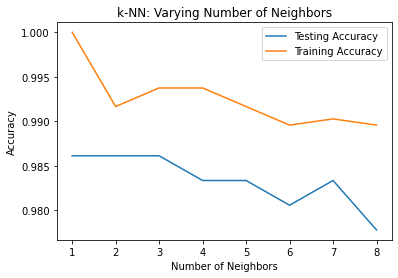

In [18]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

## 2. Regression

Importing data for supervised learning

In this chapter, you will work with Gapminder data that we have consolidated into one CSV file available in the workspace as 'gapminder.csv'. Specifically, your goal will be to use this data to predict the life expectancy in a given country based on features such as the country's GDP, fertility rate, and population. As in Chapter 1, the dataset has been preprocessed.

Since the target variable here is quantitative, this is a regression problem. To begin, you will fit a linear regression with just one feature: 'fertility', which is the average number of children a woman in a given country gives birth to. In later exercises, you will use all the features to build regression models.

Before that, however, you need to import the data and get it into the form needed by scikit-learn. This involves creating feature and target variable arrays. Furthermore, since you are going to use only one feature to begin with, you need to do some reshaping using NumPy's .reshape() method. Don't worry too much about this reshaping right now, but it is something you will have to do occasionally when working with scikit-learn so it is useful to practice.
Instructions
0 XP

    Import numpy and pandas as their standard aliases.
    Read the file 'gapminder.csv' into a DataFrame df using the read_csv() function.
    Create array X for the 'fertility' feature and array y for the 'life' target variable.
    Reshape the arrays by using the .reshape() method and passing in -1 and 1.

Hint

    Use import x as y to import x as the alias y.
    To read in the CSV file 'gapminder.csv', pass it in as an argument to pd.read_csv().
    To create the arrays, first select the column using df['column_name'] and then access its .values attribute.
    Use .reshape(-1, 1) on X and y to reshape them.


In [19]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the CSV file into a DataFrame: df
df = pd.read_csv('gapminder.csv')

# Create arrays for features and target variable
y = df['life'].values
X = df['fertility'].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y_reshaped = y.reshape(-1, 1)
X_reshaped = X.reshape(-1, 1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: ", y_reshaped.shape)
print("Dimensions of X after reshaping: ", X_reshaped.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'gapminder.csv'

### Linear Regression

Fit & predict for regression

Now, you will fit a linear regression and predict life expectancy using just one feature. You saw Andy do this earlier using the 'RM' feature of the Boston housing dataset. In this exercise, you will use the 'fertility' feature of the Gapminder dataset. Since the goal is to predict life expectancy, the target variable here is 'life'. The array for the target variable has been pre-loaded as y and the array for 'fertility' has been pre-loaded as X_fertility.

A scatter plot with 'fertility' on the x-axis and 'life' on the y-axis has been generated. As you can see, there is a strongly negative correlation, so a linear regression should be able to capture this trend. Your job is to fit a linear regression and then predict the life expectancy, overlaying these predicted values on the plot to generate a regression line. You will also compute and print the

score using scikit-learn's .score() method.
Instructions
0 XP

    Import LinearRegression from sklearn.linear_model.
    Create a LinearRegression regressor called reg.
    Set up the prediction space to range from the minimum to the maximum of X_fertility. This has been done for you.
    Fit the regressor to the data (X_fertility and y) and compute its predictions using the .predict() method and the prediction_space array.
    Compute and print the 

    score using the .score() method.
    Overlay the plot with your linear regression line. This has been done for you, so hit submit to see the result!

Hint

    You can import x from y using the command from y import x.
    Use the function LinearRegression() to create the regressor.
    Use the .fit() method on reg with X_fertility and y as arguments to fit the model.
    Use the .predict() method on reg with prediction_space as the argument to compute the predictions.
    Use the .score() method with X_fertility and y as arguments to compute the 

score.

In [20]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()


NameError: name 'X_fertility' is not defined

Train/test split for regression

As you learned in Chapter 1, train and test sets are vital to ensure that your supervised learning model is able to generalize well to new data. This was true for classification models, and is equally true for linear regression models.

In this exercise, you will split the Gapminder dataset into training and testing sets, and then fit and predict a linear regression over all features. In addition to computing the

score, you will also compute the Root Mean Squared Error (RMSE), which is another commonly used metric to evaluate regression models. The feature array X and target variable array y have been pre-loaded for you from the DataFrame df.
Instructions
0 XP

    Import LinearRegression from sklearn.linear_model, mean_squared_error from sklearn.metrics, and train_test_split from sklearn.model_selection.
    Using X and y, create training and test sets such that 30% is used for testing and 70% for training. Use a random state of 42.
    Create a linear regression regressor called reg_all, fit it to the training set, and evaluate it on the test set.
    Compute and print the 

    score using the .score() method on the test set.
    Compute and print the RMSE. To do this, first compute the Mean Squared Error using the mean_squared_error() function with the arguments y_test and y_pred, and then take its square root using np.sqrt().

Hint

    Use the command from y import x to import x from y.
    Use train_test_split() to create training and test sets. Pass in the arguments X and y, and specify the test set size using test_size (or the training set size using train_size) and the random state using random_state.
    To create the regressor, use LinearRegression(). Then use .fit() to fit it to X_train and y_train, and .predict() to evaluate it over X_test.
    To compute the RMSE, compute the mean squared error inside the provided np.sqrt() function using the mean_squared_error() function.


In [21]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.5816543438880978
Root Mean Squared Error: 1.8285553709339546


### Cross-Validation

5-fold cross-validation

Cross-validation is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the available data.

In this exercise, you will practice 5-fold cross validation on the Gapminder data. By default, scikit-learn's cross_val_score() function uses

as the metric of choice for regression. Since you are performing 5-fold cross-validation, the function will return 5 scores. Your job is to compute these 5 scores and then take their average.

The DataFrame has been loaded as df and split into the feature/target variable arrays X and y. The modules pandas and numpy have been imported as pd and np, respectively.
Instructions
0 XP

    Import LinearRegression from sklearn.linear_model and cross_val_score from sklearn.model_selection.
    Create a linear regression regressor called reg.
    Use the cross_val_score() function to perform 5-fold cross-validation on X and y.
    Compute and print the average cross-validation score. You can use NumPy's mean() function to compute the average.

Hint

    Use the command from y import x to import x from y.
    Use the LinearRegression() function to create the regressor.
    Inside cross_val_score(), specify the arguments reg, X, y, and cv=5.
    Pass cv_scores to the first function, and np.mean(cv_scores) to the format() function of the second print() function.


In [22]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

# Print the average 5-fold cross-validation score
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.48346048 0.5583603  0.57534522 0.5056632  0.40995457]
Average 5-Fold CV Score: 0.5065567550630684


K-Fold CV comparison

Cross validation is essential but do not forget that the more folds you use, the more computationally expensive cross-validation becomes. In this exercise, you will explore this for yourself. Your job is to perform 3-fold cross-validation and then 10-fold cross-validation on the Gapminder dataset.

In the IPython Shell, you can use %timeit to see how long each 3-fold CV takes compared to 10-fold CV by executing the following cv=3 and cv=10:

%timeit cross_val_score(reg, X, y, cv = ____)

pandas and numpy are available in the workspace as pd and np. The DataFrame has been loaded as df and the feature/target variable arrays X and y have been created.
Instructions
0 XP

    Import LinearRegression from sklearn.linear_model and cross_val_score from sklearn.model_selection.
    Create a linear regression regressor called reg.
    Perform 3-fold CV and then 10-fold CV. Compare the resulting mean scores.

Hint

    Use the command from y import x to import x from y.
    Use the LinearRegression() function to create the regressor.
    Use the cross_val_score() function with reg, X, and y as arguments. For 3-fold CV, specify cv=3, and for 10-fold CV, specify cv=10.


In [23]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, X, y, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv = 10)
print(np.mean(cvscores_10))


0.5028775279011317
0.5343874961263952


### Regularized Expression

Regularization I: Lasso

In the video, you saw how Lasso selected out the 'RM' feature as being the most important for predicting Boston house prices, while shrinking the coefficients of certain other features to 0. Its ability to perform feature selection in this way becomes even more useful when you are dealing with data involving thousands of features.

In this exercise, you will fit a lasso regression to the Gapminder data you have been working with and plot the coefficients. Just as with the Boston data, you will find that the coefficients of some features are shrunk to 0, with only the most important ones remaining.

The feature and target variable arrays have been pre-loaded as X and y.
Instructions
0 XP

    Import Lasso from sklearn.linear_model.
    Instantiate a Lasso regressor with an alpha of 0.4 and specify normalize=True.
    Fit the regressor to the data and compute the coefficients using the coef_ attribute.
    Plot the coefficients on the y-axis and column names on the x-axis. This has been done for you, so hit submit to view the plot!

Hint

    Use the command from y import x to import x from y.
    Use the Lasso() function with alpha=0.4 and normalize=True to instantiate the regressor.
    Use the .fit() method of the regressor on X and y to fit it to the data.
    To compute the coefficients, access the .coef_ attribute of the lasso regressor.


In [24]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()


[ 0. -0. -0. -0.  0.  0.  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
  0. -0. -0.  0.  0.  0. -0. -0.  0.  0.  0.  0. -0. -0.  0. -0. -0.  0.
  0.  0. -0.  0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0. -0.
  0. -0. -0. -0.  0. -0. -0. -0. -0. -0.]


NameError: name 'df_columns' is not defined

Regularization II: Ridge

Lasso is great for feature selection, but when building regression models, Ridge regression should be your first choice.

Recall that lasso performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha. This is also known as
regularization because the regularization term is the

norm of the coefficients. This is not the only way to regularize, however.

If instead you took the sum of the squared values of the coefficients multiplied by some alpha - like in Ridge regression - you would be computing the
norm. In this exercise, you will practice fitting ridge regression models over a range of different alphas, and plot cross-validated scores for each, using this function that we have defined for you, which plots the

score as well as standard error for each alpha:

def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

Don't worry about the specifics of the above function works. The motivation behind this exercise is for you to see how the

score varies with different alphas, and to understand the importance of selecting the right value for alpha. You'll learn how to tune alpha in the next chapter.
Instructions
70 XP

    Instantiate a Ridge regressor and specify normalize=True.
    Inside the for loop:
        Specify the alpha value for the regressor to use.
        Perform 10-fold cross-validation on the regressor with the specified alpha. The data is available in the arrays X and y.
        Append the average and the standard deviation of the computed cross-validated scores. NumPy has been pre-imported for you as np.
    Use the display_plot() function to visualize the scores and standard deviations.

Hint

    Use Ridge() to create the ridge regressor, and specify normalize=True.
    Inside the for loop:
        Specify the alpha value by assigning alpha to ridge.alpha.
        Use the cross_val_score() function with ridge, X, y, and cv=10 as arguments.
        Use the np.mean() and np.std() functions to compute the mean and standard deviation of ridge_cv_scores.


In [25]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)


NameError: name 'display_plot' is not defined

## 3. Fine-tuning your model

Metrics for classification

In Chapter 1, you evaluated the performance of your k-NN classifier based on its accuracy. However, as Andy discussed, accuracy is not always an informative metric. In this exercise, you will dive more deeply into evaluating the performance of binary classifiers by computing a confusion matrix and generating a classification report.

You may have noticed in the video that the classification report consisted of three rows, and an additional support column. The support gives the number of samples of the true response that lie in that class - so in the video example, the support was the number of Republicans or Democrats in the test set on which the classification report was computed. The precision, recall, and f1-score columns, then, gave the respective metrics for that particular class.

Here, you'll work with the PIMA Indians dataset obtained from the UCI Machine Learning Repository. The goal is to predict whether or not a given female patient will contract diabetes based on features such as BMI, age, and number of pregnancies. Therefore, it is a binary classification problem. A target value of 0 indicates that the patient does not have diabetes, while a value of 1 indicates that the patient does have diabetes. As in Chapters 1 and 2, the dataset has been preprocessed to deal with missing values.

The dataset has been loaded into a DataFrame df and the feature and target variable arrays X and y have been created for you. In addition, sklearn.model_selection.train_test_split and sklearn.neighbors.KNeighborsClassifier have already been imported.

Your job is to train a k-NN classifier to the data and evaluate its performance by generating a confusion matrix and classification report.
Instructions
0 XP

    Import classification_report and confusion_matrix from sklearn.metrics.
    Create training and testing sets with 40% of the data used for testing. Use a random state of 42.
    Instantiate a k-NN classifier with 6 neighbors, fit it to the training data, and predict the labels of the test set.
    Compute and print the confusion matrix and classification report using the confusion_matrix() and classification_report() functions.

Hint

    Use the command from y import x to import x from y.
    Use the train_test_split() and pass it the feature and target variable arrays X and y. In addition, specify the test_size and random_state parameters.
    Instantiate a k-NN classifier using the KNeighborsClassifier() function, fit it to the training data using .fit() on the classifier with X_train and y_train as arguments, and then predict the labels of the test set using .predict() on the classifier with X_test as argument.
    Pass y_test and y_pred as arguments to confusion_matrix() and classification_report() to generate, respectively, the confusion matrix and classification report.


In [26]:
# Import necessary modules
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[67  0  0  0  0  0  0  0  0  0]
 [ 0 72  0  0  0  0  0  0  0  0]
 [ 0  0 66  0  0  0  0  0  0  0]
 [ 0  0  0 70  0  0  0  0  1  0]
 [ 0  0  0  0 78  0  0  0  0  0]
 [ 0  0  0  0  0 82  1  0  0  0]
 [ 0  0  0  0  0  0 69  0  0  0]
 [ 0  0  0  0  0  0  0 71  0  0]
 [ 0  2  0  0  0  0  0  0 63  0]
 [ 0  0  0  1  1  1  0  0  0 74]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.97      1.00      0.99        72
           2       1.00      1.00      1.00        66
           3       0.99      0.99      0.99        71
           4       0.99      1.00      0.99        78
           5       0.99      0.99      0.99        83
           6       0.99      1.00      0.99        69
           7       1.00      1.00      1.00        71
           8       0.98      0.97      0.98        65
           9       1.00      0.96      0.98        77

    accuracy                           0.99       719
   macro avg       

### Logistic Regression and the ROC Curve

Building a logistic regression model

Time to build your first logistic regression model! As Hugo showed in the video, scikit-learn makes it very easy to try different models, since the Train-Test-Split/Instantiate/Fit/Predict paradigm applies to all classifiers and regressors - which are known in scikit-learn as 'estimators'. You'll see this now for yourself as you train a logistic regression model on exactly the same data as in the previous exercise. Will it outperform k-NN? There's only one way to find out!

The feature and target variable arrays X and y have been pre-loaded, and train_test_split has been imported for you from sklearn.model_selection.
Instructions
0 XP

    Import:
        LogisticRegression from sklearn.linear_model.
        confusion_matrix and classification_report from sklearn.metrics.
    Create training and test sets with 40% (or 0.4) of the data used for testing. Use a random state of 42. This has been done for you.
    Instantiate a LogisticRegression classifier called logreg.
    Fit the classifier to the training data and predict the labels of the test set.
    Compute and print the confusion matrix and classification report. This has been done for you, so hit submit to see how logistic regression compares to k-NN!

Hint

    Use the command from y import x to import x from y.
    Use LogisticRegression() to instantiate the logistic regression classifier.
    To fit the classifier, use the .fit() method on logreg with X_train and y_train as arguments. To predict, use .predict() on logreg with X_test as the argument.


In [27]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[67  0  0  0  0  0  0  0  0  0]
 [ 0 68  0  0  1  0  0  0  2  1]
 [ 0  0 66  0  0  0  0  0  0  0]
 [ 0  0  1 69  0  1  0  0  0  0]
 [ 0  1  0  0 76  0  1  0  0  0]
 [ 0  1  0  0  0 80  1  0  0  1]
 [ 0  0  0  0  0  1 68  0  0  0]
 [ 0  0  0  0  0  0  0 69  0  2]
 [ 0  2  0  0  1  1  0  0 61  0]
 [ 0  0  0  1  0  0  0  0  3 73]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.94      0.94      0.94        72
           2       0.99      1.00      0.99        66
           3       0.99      0.97      0.98        71
           4       0.97      0.97      0.97        78
           5       0.96      0.96      0.96        83
           6       0.97      0.99      0.98        69
           7       1.00      0.97      0.99        71
           8       0.92      0.94      0.93        65
           9       0.95      0.95      0.95        77

    accuracy                           0.97       719
   macro avg       

/Users/bropo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Plotting an ROC curve

Great job in the previous exercise - you now have a new addition to your toolbox of classifiers!

Classification reports and confusion matrices are great methods to quantitatively evaluate model performance, while ROC curves provide a way to visually evaluate models. As Hugo demonstrated in the video, most classifiers in scikit-learn have a .predict_proba() method which returns the probability of a given sample being in a particular class. Having built a logistic regression model, you'll now evaluate its performance by plotting an ROC curve. In doing so, you'll make use of the .predict_proba() method and become familiar with its functionality.

Here, you'll continue working with the PIMA Indians diabetes dataset. The classifier has already been fit to the training data and is available as logreg.
Instructions
0 XP

    Import roc_curve from sklearn.metrics.
    Using the logreg classifier, which has been fit to the training data, compute the predicted probabilities of the labels of the test set X_test. Save the result as y_pred_prob.
    Use the roc_curve() function with y_test and y_pred_prob and unpack the result into the variables fpr, tpr, and thresholds.
    Plot the ROC curve with fpr on the x-axis and tpr on the y-axis.

Hint

    Use the command from y import x to import x from y.
    Use the .predict_proba() method on logreg to compute the predicted probabilities. Be sure to access the 2nd column of the resulting array.
    Pass y_test and y_pred_prob as arguments to the roc_curve() function, and be sure to unpack the output of this into the variables fpr, tpr, and thresholds (in that order).
    Pass fpr and tpr as arguments to plt.plot() to plot the ROC curve.


In [28]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

ValueError: multiclass format is not supported

Precision-recall Curve

When looking at your ROC curve, you may have noticed that the y-axis (True positive rate) is also known as recall. Indeed, in addition to the ROC curve, there are other ways to visually evaluate model performance. One such way is the precision-recall curve, which is generated by plotting the precision and recall for different thresholds. As a reminder, precision and recall are defined as:

On the right, a precision-recall curve has been generated for the diabetes dataset. The classification report and confusion matrix are displayed in the IPython Shell.

Study the precision-recall curve and then consider the statements given below. Choose the one statement that is  true. Note that here, the class is positive (1) if the individual has diabetes.

Precision and Recall do not take true negatives into consideration

AUC computation

Say you have a binary classifier that in fact is just randomly making guesses. It would be correct approximately 50% of the time, and the resulting ROC curve would be a diagonal line in which the True Positive Rate and False Positive Rate are always equal. The Area under this ROC curve would be 0.5. This is one way in which the AUC, which Hugo discussed in the video, is an informative metric to evaluate a model. If the AUC is greater than 0.5, the model is better than random guessing. Always a good sign!

In this exercise, you'll calculate AUC scores using the roc_auc_score() function from sklearn.metrics as well as by performing cross-validation on the diabetes dataset.

X and y, along with training and test sets X_train, X_test, y_train, y_test, have been pre-loaded for you, and a logistic regression classifier logreg has been fit to the training data.
Instructions
100 XP

    Import roc_auc_score from sklearn.metrics and cross_val_score from sklearn.model_selection.
    Using the logreg classifier, which has been fit to the training data, compute the predicted probabilities of the labels of the test set X_test. Save the result as y_pred_prob.
    Compute the AUC score using the roc_auc_score() function, the test set labels y_test, and the predicted probabilities y_pred_prob.
    Compute the AUC scores by performing 5-fold cross-validation. Use the cross_val_score() function and specify the scoring parameter to be 'roc_auc'
    
Hint

    Use the command from y import x to import x from y.
    Use the .predict_proba() method on logreg to compute the predicted probabilities. Be sure to access the 2nd column of the resulting array.
    Pass in y_test and y_pred_prob as arguments to the roc_auc_score() function to calculate the AUC score.
    You have to specify the additional keyword argument scoring='roc_auc' inside cross_val_score() to compute the AUC scores by performing cross-validation. Be sure to also specify cv=5 and pass in the feature and target variable arrays X and y in the correct order.


In [29]:
# Import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))


ValueError: multi_class must be in ('ovo', 'ovr')

### Hyperparameter Tuning

Hyperparameter tuning with GridSearchCV

Hugo demonstrated how to tune the n_neighbors parameter of the KNeighborsClassifier() using GridSearchCV on the voting dataset. You will now practice this yourself, but by using logistic regression on the diabetes dataset instead!

Like the alpha parameter of lasso and ridge regularization that you saw earlier, logistic regression also has a regularization parameter:
. controls the inverse of the regularization strength, and this is what you will tune in this exercise. A large can lead to an overfit model, while a small

can lead to an underfit model.

The hyperparameter space for
has been setup for you. Your job is to use GridSearchCV and logistic regression to find the optimal

in this hyperparameter space. The feature array is available as X and target variable array is available as y.

You may be wondering why you aren't asked to split the data into training and test sets. Good observation! Here, we want you to focus on the process of setting up the hyperparameter grid and performing grid-search cross-validation. In practice, you will indeed want to hold out a portion of your data for evaluation purposes, and you will learn all about this in the next video!
Instructions
0 XP

    Import LogisticRegression from sklearn.linear_model and GridSearchCV from sklearn.model_selection.
    Setup the hyperparameter grid by using c_space as the grid of values to tune 

over.
Instantiate a logistic regression classifier called logreg.
Use GridSearchCV with 5-fold cross-validation to tune

    :
        Inside GridSearchCV(), specify the classifier, parameter grid, and number of folds to use.
        Use the .fit() method on the GridSearchCV object to fit it to the data X and y.
    Print the best parameter and best score obtained from GridSearchCV by accessing the best_params_ and best_score_ attributes of logreg_cv.

Hint

    Use the command from y import x to import x from y.
    To setup the hyperparameter grid, use c_space as the value for the key 'C' in the param_grid dictionary.
    Use LogisticRegression() to instantiate a logistic regression classifier.
    Inside GridSearchCV(), pass in the classifier logreg, parameter grid param_grid, and specify the number of folds to use. Then use the .fit() method on this with X and y passed in as arguments.
    Use the following format to access an attribute of an object: object_name.attribute_name. For example: logreg_cv.best_score_.


In [30]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X, y)

# Print the tuned parameter and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))


/Users/bropo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/bropo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

Tuned Logistic Regression Parameters: {'C': 0.006105402296585327}
Best score is 0.928232745280099


/Users/bropo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Hyperparameter tuning with RandomizedSearchCV

GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions. You'll practice using RandomizedSearchCV in this exercise and see how this works.

Here, you'll also be introduced to a new model: the Decision Tree. Don't worry about the specifics of how this model works. Just like k-NN, linear regression, and logistic regression, decision trees in scikit-learn have .fit() and .predict() methods that you can use in exactly the same way as before. Decision trees have many parameters that can be tuned, such as max_features, max_depth, and min_samples_leaf: This makes it an ideal use case for RandomizedSearchCV.

As before, the feature array X and target variable array y of the diabetes dataset have been pre-loaded. The hyperparameter settings have been specified for you. Your goal is to use RandomizedSearchCV to find the optimal hyperparameters. Go for it!
Instructions
0 XP

    Import DecisionTreeClassifier from sklearn.tree and RandomizedSearchCV from sklearn.model_selection.
    Specify the parameters and distributions to sample from. This has been done for you.
    Instantiate a DecisionTreeClassifier.
    Use RandomizedSearchCV with 5-fold cross-validation to tune the hyperparameters:
        Inside RandomizedSearchCV(), specify the classifier, parameter distribution, and number of folds to use.
        Use the .fit() method on the RandomizedSearchCV object to fit it to the data X and y.
    Print the best parameter and best score obtained from RandomizedSearchCV by accessing the best_params_ and best_score_ attributes of tree_cv.

Hint

    Use the command from y import x to import x from y.
    Use DecisionTreeClassifier() to instantiate a decision tree classifier.
    Inside RandomizedSearchCV(), pass in the classifier tree, parameter distribution param_dist, and specify the number of folds to use. Then use the .fit() method on this with X and y passed in as arguments.
    Use the following format to access an attribute of an object: object_name.attribute_name. For example: tree_cv.best_score_.


In [31]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 3}
Best score is 0.7312627669452183


### Hold-out set

Hold-out set in practice I: Classification

You will now practice evaluating a model with tuned hyperparameters on a hold-out set. The feature array and target variable array from the diabetes dataset have been pre-loaded as X and y.

In addition to

, logistic regression has a 'penalty' hyperparameter which specifies whether to use 'l1' or 'l2' regularization. Your job in this exercise is to create a hold-out set, tune the 'C' and 'penalty' hyperparameters of a logistic regression classifier using GridSearchCV on the training set.
Instructions
0 XP

    Create the hyperparameter grid:
        Use the array c_space as the grid of values for 'C'.
        For 'penalty', specify a list consisting of 'l1' and 'l2'.
    Instantiate a logistic regression classifier.
    Create training and test sets. Use a test_size of 0.4 and random_state of 42. In practice, the test set here will function as the hold-out set.
    Tune the hyperparameters on the training set using GridSearchCV with 5-folds. This involves first instantiating the GridSearchCV object with the correct parameters and then fitting it to the training data.
    Print the best parameter and best score obtained from GridSearchCV by accessing the best_params_ and best_score_ attributes of logreg_cv.

Hint

    In the param_grid dictionary, use 'C' and c_space as the first key:value pair, and 'penalty' and ['l1', 'l2'] as the second.
    Use LogisticRegression() to instantiate a logistic regression classifier.
    Use train_test_split() to create training and test sets. Pass in the arguments X and y, and specify the keyword arguments test_size=0.4 and random_state=42.
    Inside GridSearchCV(), pass in the classifier logreg, parameter grid param_grid, and specify the number of folds to use. Then use the .fit() method on this with X_train and y_train passed in as arguments.
    Use the following format to access an attribute of an object: object_name.attribute_name. For example: logreg_cv.best_score_.


In [ ]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))



Hold-out set in practice II: Regression

Remember lasso and ridge regression from the previous chapter? Lasso used the
penalty to regularize, while ridge used the penalty. There is another type of regularized regression known as the elastic net. In elastic net regularization, the penalty term is a linear combination of the and

penalties:

In scikit-learn, this term is represented by the 'l1_ratio' parameter: An 'l1_ratio' of 1 corresponds to an penalty, and anything lower is a combination of and

.

In this exercise, you will GridSearchCV to tune the 'l1_ratio' of an elastic net model trained on the Gapminder data. As in the previous exercise, use a hold-out set to evaluate your model's performance.
Instructions
0 XP
Instructions
0 XP

    Import the following modules:
        ElasticNet from sklearn.linear_model.
        mean_squared_error from sklearn.metrics.
        GridSearchCV and train_test_split from sklearn.model_selection.
    Create training and test sets, with 40% of the data used for the test set. Use a random state of 42.
    Specify the hyperparameter grid for 'l1_ratio' using l1_space as the grid of values to search over.
    Instantiate the ElasticNet regressor.
    Use GridSearchCV with 5-fold cross-validation to tune 'l1_ratio' on the training data X_train and y_train. This involves first instantiating the GridSearchCV object with the correct parameters and then fitting it to the training data.
    Predict on the test set and compute the 

    and mean squared error.

Hint

    Use the command from y import x to import x from y.
    Use train_test_split() to create training and test sets. Pass in the arguments X and y, and specify the keyword arguments test_size=0.4 and random_state=42.
    In the param_grid dictionary, use l1_space as the grid of values to tune 'l1_ratio' over.
    Use ElasticNet() to instantiate the regressor.
    Inside GridSearchCV(), pass in the regressor elastic_net, parameter grid param_grid, and specify the number of folds to use. Then use the .fit() method on this with X_train and y_train passed in as arguments.
    To compute r2, use the .score() method with X_test and y_test as arguments. To compute mse, use the mean_squared_error() function with y_test and y_pred as arguments.


In [ ]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))


## 4. Preprocessing Data

Exploring categorical features

The Gapminder dataset that you worked with in previous chapters also contained a categorical 'Region' feature, which we dropped in previous exercises since you did not have the tools to deal with it. Now however, you do, so we have added it back in!

Your job in this exercise is to explore this feature. Boxplots are particularly useful for visualizing categorical features such as this.
Instructions
0 XP

    Import pandas as pd.
    Read the CSV file 'gapminder.csv' into a DataFrame called df.
    Use pandas to create a boxplot showing the variation of life expectancy ('life') by region ('Region'). To do so, pass the column names in to df.boxplot() (in that order).

Hint

    Use the command import x as y to import x as the alias y.
    Use the pandas' read_csv() function with 'gapminder.csv' as argument to read it into a DataFrame.
    To create the boxplot, pass 'life' and 'Region' in as arguments to df.boxplot().


In [33]:
# Import pandas
import pandas as pd

# Read 'gapminder.csv' into a DataFrame: df
df = pd.read_csv('gapminder.csv')

# Create a boxplot of life expectancy per region
df.boxplot('life', 'Region', rot=60)

# Show the plot
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'gapminder.csv'

Creating dummy variables

As Andy discussed in the video, scikit-learn does not accept non-numerical features. You saw in the previous exercise that the 'Region' feature contains very useful information that can predict life expectancy. For example, Sub-Saharan Africa has a lower life expectancy compared to Europe and Central Asia. Therefore, if you are trying to predict life expectancy, it would be preferable to retain the 'Region' feature. To do this, you need to binarize it by creating dummy variables, which is what you will do in this exercise.
Instructions
0 XP

    Use the pandas get_dummies() function to create dummy variables from the df DataFrame. Store the result as df_region.
    Print the columns of df_region. This has been done for you.
    Use the get_dummies() function again, this time specifying drop_first=True to drop the unneeded dummy variable (in this case, 'Region_America').
    Hit submit to print the new columns of df_region and take note of how one column was dropped!

Hint

    Use pd.get_dummies() with df as argument to create the dummy variables.
    To automatically drop one dummy variable, use pd.get_dummies() with df as before, but specify the additional keyword argument drop_first=True.


In [34]:
# Create dummy variables: df_region
df_region = pd.get_dummies(df)

# Print the columns of df_region
print(df_region.columns)

# Drop 'Region_America' from df_region
df_region = pd.get_dummies(df, drop_first=True)

# Print the new columns of df_region
print(df_region.columns)

NameError: name 'df' is not defined

Regression with categorical features

Having created the dummy variables from the 'Region' feature, you can build regression models as you did before. Here, you'll use ridge regression to perform 5-fold cross-validation.

The feature array X and target variable array y have been pre-loaded.
Instructions
0 XP

    Import Ridge from sklearn.linear_model and cross_val_score from sklearn.model_selection.
    Instantiate a ridge regressor called ridge with alpha=0.5 and normalize=True.
    Perform 5-fold cross-validation on X and y using the cross_val_score() function.
    Print the cross-validated scores.

Hint

    Use the command from y import x to import x from y.
    Inside Ridge(), specify the keyword arguments alpha=0.5 and normalize=True to instantiate the ridge regressor.
    Inside cross_val_score(), specify the regressor ridge, the feature array X, target variable y, and number of folds to use.
    Pass ridge_cv as an argument to the provided print() function to print the cross-validated scores.


In [35]:
# Import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.5, normalize=True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X, y, cv=5)

# Print the cross-validated scores
print(ridge_cv)

[0.37142642 0.52973072 0.51386732 0.47880956 0.44615915]


### Handling Missing Data

Dropping missing data

The voting dataset from Chapter 1 contained a bunch of missing values that we dealt with for you behind the scenes. Now, it's time for you to take care of these yourself!

The unprocessed dataset has been loaded into a DataFrame df. Explore it in the IPython Shell with the .head() method. You will see that there are certain data points labeled with a '?'. These denote missing values. As you saw in the video, different datasets encode missing values in different ways. Sometimes it may be a '9999', other times a 0 - real-world data can be very messy! If you're lucky, the missing values will already be encoded as NaN. We use NaN because it is an efficient and simplified way of internally representing missing data, and it lets us take advantage of pandas methods such as .dropna() and .fillna(), as well as scikit-learn's Imputation transformer Imputer().

In this exercise, your job is to convert the '?'s to NaNs, and then drop the rows that contain them from the DataFrame.
Instructions
0 XP

    Explore the DataFrame df in the IPython Shell. Notice how the missing value is represented.
    Convert all '?' data points to np.nan.
    Count the total number of NaNs using the .isnull() and .sum() methods. This has been done for you.
    Drop the rows with missing values from df using .dropna().
    Hit submit to see how many rows were lost by dropping the missing values.

Hint

    Use df.head() to explore df in the IPython Shell and notice how '?' is used to represent missing values.
    Access all the entries that are '?' using DataFrame slicing methods and convert these to np.nan.
    Use the .dropna() method on df to drop all rows with missing values.


In [3]:
# Convert '?' to NaN
df[df == '?'] = np.nan

# Print the number of NaNs
print(df.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(df.shape))

# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))


NameError: name 'np' is not defined

Imputing missing data in a ML Pipeline I

As you've come to appreciate, there are many steps to building a model, from creating training and test sets, to fitting a classifier or regressor, to tuning its parameters, to evaluating its performance on new data. Imputation can be seen as the first step of this machine learning process, the entirety of which can be viewed within the context of a pipeline. Scikit-learn provides a pipeline constructor that allows you to piece together these steps into one process and thereby simplify your workflow.

You'll now practice setting up a pipeline with two steps: the imputation step, followed by the instantiation of a classifier. You've seen three classifiers in this course so far: k-NN, logistic regression, and the decision tree. You will now be introduced to a fourth one - the Support Vector Machine, or SVM. For now, do not worry about how it works under the hood. It works exactly as you would expect of the scikit-learn estimators that you have worked with previously, in that it has the same .fit() and .predict() methods as before.
Instructions
0 XP

    Import Imputer from sklearn.preprocessing and SVC from sklearn.svm. SVC stands for Support Vector Classification, which is a type of SVM.
    Setup the Imputation transformer to impute missing data (represented as 'NaN') with the 'most_frequent' value in the column (axis=0).
    Instantiate a SVC classifier. Store the result in clf.
    Create the steps of the pipeline by creating a list of tuples:
        The first tuple should consist of the imputation step, using imp.
        The second should consist of the classifier.

Hint

    Use the command from y import x to import x from y.
    Inside Imputer(), pass in 'NaN', 'most_frequent' and 0 for missing_values, strategy, and axis, respectively.
    Use SVC() to instantiate the SVC classifier.
    The two tuples needed are ('imputation', imp), and ('SVM', clf).


In [4]:
# Import the Imputer module
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC

# Setup the Imputation transformer: imp
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp),
        ('SVM', clf)]


ImportError: cannot import name 'Imputer' from 'sklearn.preprocessing' (/Users/bropo/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/__init__.py)

Imputing missing data in a ML Pipeline II

Having setup the steps of the pipeline in the previous exercise, you will now use it on the voting dataset to classify a Congressman's party affiliation. What makes pipelines so incredibly useful is the simple interface that they provide. You can use the .fit() and .predict() methods on pipelines just as you did with your classifiers and regressors!

Practice this for yourself now and generate a classification report of your predictions. The steps of the pipeline have been set up for you, and the feature array X and target variable array y have been pre-loaded. Additionally, train_test_split and classification_report have been imported from sklearn.model_selection and sklearn.metrics respectively.
Instructions
0 XP

    Import the following modules:
        Imputer from sklearn.preprocessing and Pipeline from sklearn.pipeline.
        SVC from sklearn.svm.
    Create the pipeline using Pipeline() and steps.
    Create training and test sets. Use 30% of the data for testing and a random state of 42.
    Fit the pipeline to the training set and predict the labels of the test set.
    Compute the classification report.

Hint

    Use the command from y import x to import x from y.
    To create the pipeline, pass in steps to Pipeline().
    Use the train_test_split() function to create the training and test sets. Pass in X and y, and specify the keyword arguments test_size=0.3 and random_state=42.
    Use the .fit() method on pipeline with X_train, y_train as arguments. Then, use the .predict() method with X_test as argument to predict the labels.
    To generate the classification report, pass y_test and y_pred as arguments to classification_report().


In [ ]:
# Import necessary modules
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
        ('SVM', SVC())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))


### Centering and Scaling

Centering and scaling your data

In the video, Hugo demonstrated how significantly the performance of a model can improve if the features are scaled. Note that this is not always the case: In the Congressional voting records dataset, for example, all of the features are binary. In such a situation, scaling will have minimal impact.

You will now explore scaling for yourself on a new dataset - White Wine Quality! Hugo used the Red Wine Quality dataset in the video. We have used the 'quality' feature of the wine to create a binary target variable: If 'quality' is less than 5, the target variable is 1, and otherwise, it is 0.

The DataFrame has been pre-loaded as df, along with the feature and target variable arrays X and y. Explore it in the IPython Shell. Notice how some features seem to have different units of measurement. 'density', for instance, takes values between 0.98 and 1.04, while 'total sulfur dioxide' ranges from 9 to 440. As a result, it may be worth scaling the features here. Your job in this exercise is to scale the features and compute the mean and standard deviation of the unscaled features compared to the scaled features.
Instructions
0 XP

    Import scale from sklearn.preprocessing.
    Scale the features X using scale().
    Print the mean and standard deviation of the unscaled features X, and then the scaled features X_scaled. Use the numpy functions np.mean() and np.std() to compute the mean and standard deviations.

Hint

    Use the command from y import x to import x from y.
    Scale the features by passing X to scale().
    Use np.mean() and np.std() on X and X_scaled to compute the mean and standard deviation of the scaled and unscaled features. Place these inside the provided print() functions.


In [5]:
# Import scale
from sklearn.preprocessing import scale

# Scale the features: X_scaled
X_scaled = scale(X)

# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(np.mean(X))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(X)))

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(np.mean(X_scaled))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(X_scaled)))

NameError: name 'X' is not defined

Centering and scaling in a pipeline

With regard to whether or not scaling is effective, the proof is in the pudding! See for yourself whether or not scaling the features of the White Wine Quality dataset has any impact on its performance. You will use a k-NN classifier as part of a pipeline that includes scaling, and for the purposes of comparison, a k-NN classifier trained on the unscaled data has been provided.

The feature array and target variable array have been pre-loaded as X and y. Additionally, KNeighborsClassifier and train_test_split have been imported from sklearn.neighbors and sklearn.model_selection, respectively.
Instructions
0 XP

    Import the following modules:
        StandardScaler from sklearn.preprocessing.
        Pipeline from sklearn.pipeline.
    Complete the steps of the pipeline with StandardScaler() for 'scaler' and KNeighborsClassifier() for 'knn'.
    Create the pipeline using Pipeline() and steps.
    Create training and test sets, with 30% used for testing. Use a random state of 42.
    Fit the pipeline to the training set.
    Compute the accuracy scores of the scaled and unscaled models by using the .score() method inside the provided print() functions.

Hint

    Use the command from y import x to import x from y.
    The two tuples needed in the pipeline steps are ('scaler', StandardScaler()), and ('knn', KNeighborsClassifier()).
    To create the pipeline, pass in steps to Pipeline().
    Use the train_test_split() function to create the training and test sets. Pass in X and y, and specify the keyword arguments test_size=0.3 and random_state=42.
    Use the .fit() method on pipeline with X_train, y_train as arguments.
    Use the .score() method on knn_scaled and knn_unscaled with X_test and y_test as arguments to compute the accuracy scores.


In [6]:
# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))


NameError: name 'KNeighborsClassifier' is not defined

Bringing it all together I: Pipeline for classification

It is time now to piece together everything you have learned so far into a pipeline for classification! Your job in this exercise is to build a pipeline that includes scaling and hyperparameter tuning to classify wine quality.

You'll return to using the SVM classifier you were briefly introduced to earlier in this chapter. The hyperparameters you will tune are
and . controls the regularization strength. It is analogous to the you tuned for logistic regression in Chapter 3, while

controls the kernel coefficient: Do not worry about this now as it is beyond the scope of this course.

The following modules and functions have been pre-loaded: Pipeline, SVC, train_test_split, GridSearchCV, classification_report, accuracy_score. The feature and target variable arrays X and y have also been pre-loaded.
Instructions
0 XP

    Setup the pipeline with the following steps:
        Scaling, called 'scaler' with StandardScaler().
        Classification, called 'SVM' with SVC().
    Specify the hyperparameter space using the following notation: 'step_name__parameter_name'. Here, the step_name is SVM, and the parameter_names are C and gamma.
    Create training and test sets, with 20% of the data used for the test set. Use a random state of 21.
    Instantiate GridSearchCV with the pipeline and hyperparameter space and fit it to the training set. Use 3-fold cross-validation (This is the default, so you don't have to specify it).
    Predict the labels of the test set and compute the metrics. The metrics have been computed for you.

Hint

    The two tuples needed in the pipeline steps are ('scaler', StandardScaler()), and ('SVM', SVC()).
    To specify the hyperparameter space, use 'SVM__C' and 'SVM__gamma'.
    Use the train_test_split() function to create the training and test sets. Pass in X and y, and specify the keyword arguments test_size=0.2 and random_state=21.
    Use GridSearchCV() with the arguments pipeline and param_grid=parameters to instantiate it.
    Use the .fit() method on the GridSearchCV object cv with X_train and y_train as arguments.
    To predict the labels, use the .predict() method on cv with X_test as the argument.


In [7]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))


NameError: name 'SVC' is not defined

Bringing it all together II: Pipeline for regression

For this final exercise, you will return to the Gapminder dataset. Guess what? Even this dataset has missing values that we dealt with for you in earlier chapters! Now, you have all the tools to take care of them yourself!

Your job is to build a pipeline that imputes the missing data, scales the features, and fits an ElasticNet to the Gapminder data. You will then tune the l1_ratio of your ElasticNet using GridSearchCV.

All the necessary modules have been imported, and the feature and target variable arrays have been pre-loaded as X and y.
Instructions
0 XP

    Set up a pipeline with the following steps:
        'imputation', which uses the Imputer() transformer and the 'mean' strategy to impute missing data ('NaN') using the mean of the column.
        'scaler', which scales the features using StandardScaler().
        'elasticnet', which instantiates an ElasticNet() regressor.
    Specify the hyperparameter space for the 

ratio using the following notation: 'step_name__parameter_name'. Here, the step_name is elasticnet, and the parameter_name is l1_ratio.
Create training and test sets, with 40% of the data used for the test set. Use a random state of 42.
Instantiate GridSearchCV with the pipeline and hyperparameter space. Use 3-fold cross-validation (This is the default, so you don't have to specify it).
Fit the GridSearchCV object to the training set.
Compute

    and the best parameters. This has been done for you, so hit submit to see the results!

Hint

    The tuples needed in the pipeline steps are:
        ('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)).
        ('scaler', StandardScaler()).
        ('elasticnet', ElasticNet()).
    To specify the hyperparameter space, use 'elasticnet__l1_ratio'.
    Use the train_test_split() function to create the training and test sets. Pass in X and y, and specify the keyword arguments test_size=0.4 and random_state=42.
    Use GridSearchCV() with the arguments pipeline and param_grid=parameters to instantiate it.
    Use the .fit() method on the GridSearchCV object gm_cv with X_train and y_train as arguments.


In [8]:
# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]
         
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, parameters)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

NameError: name 'Imputer' is not defined

In [ ]:
`